In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [20]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [21]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', None)

In [22]:
data_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [23]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [24]:

def Build_Barh( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible,title):
    
    fig, ax = plt.subplots()


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი

    plt.title(title)  # add title

    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)


    plt.show()

In [25]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [26]:

def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()



                                                        სიების სორტირების ფუქნცია

In [27]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  

  union = []                          # ერთი დიდი სია 

  for i in filtered_list:
      for k in i :                    # ერთ დიდი სიაში აერთიანებს ყველაფერს 
          union.append(k)

  Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



  Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


  key_Phrases = []  #ინახავს ფრაზებს
  Quantity = []   # ინახავს რაოდენობას 

  

  items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად

  for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
      key_Phrases.append(item[0])   # უშვებს ფრაზებს
      Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს



                                                            მონაცემთა დამუშავება

                                                                Developer Type      

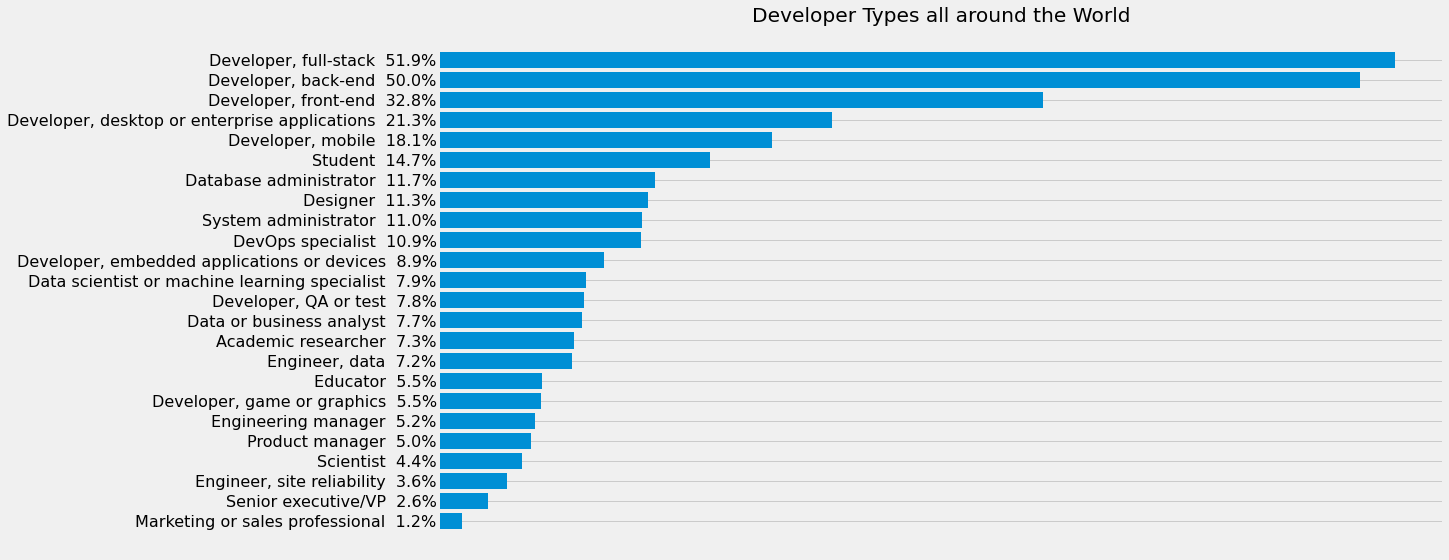

In [28]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


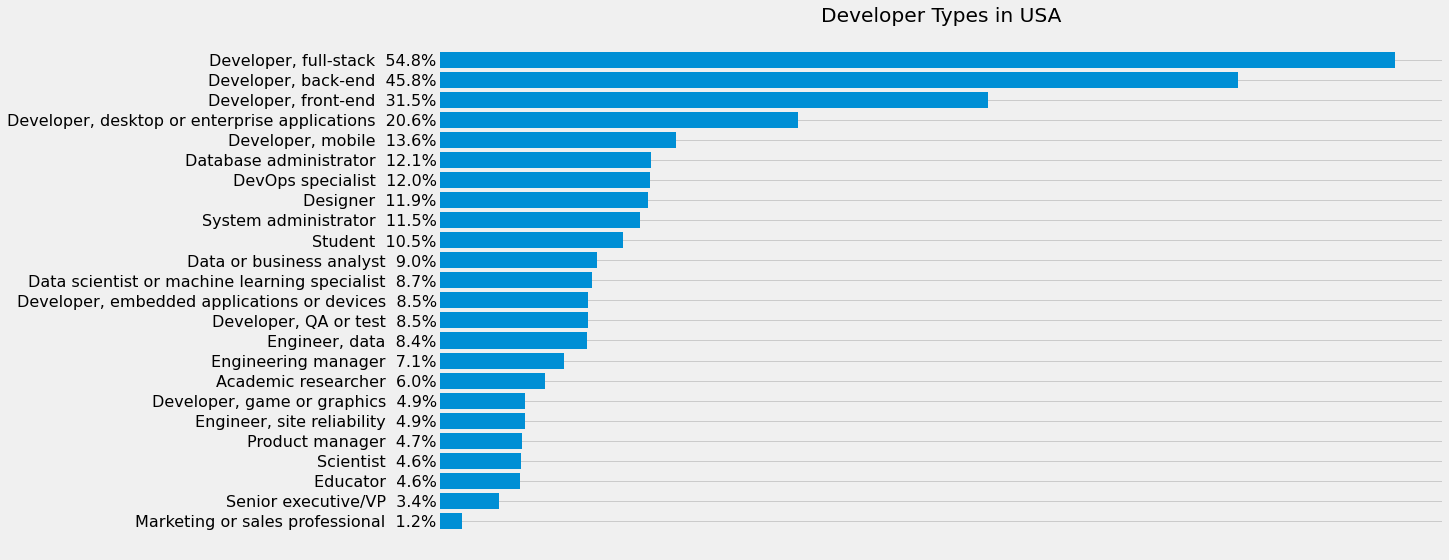

In [29]:

DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს


                                                                    OpenSourcer

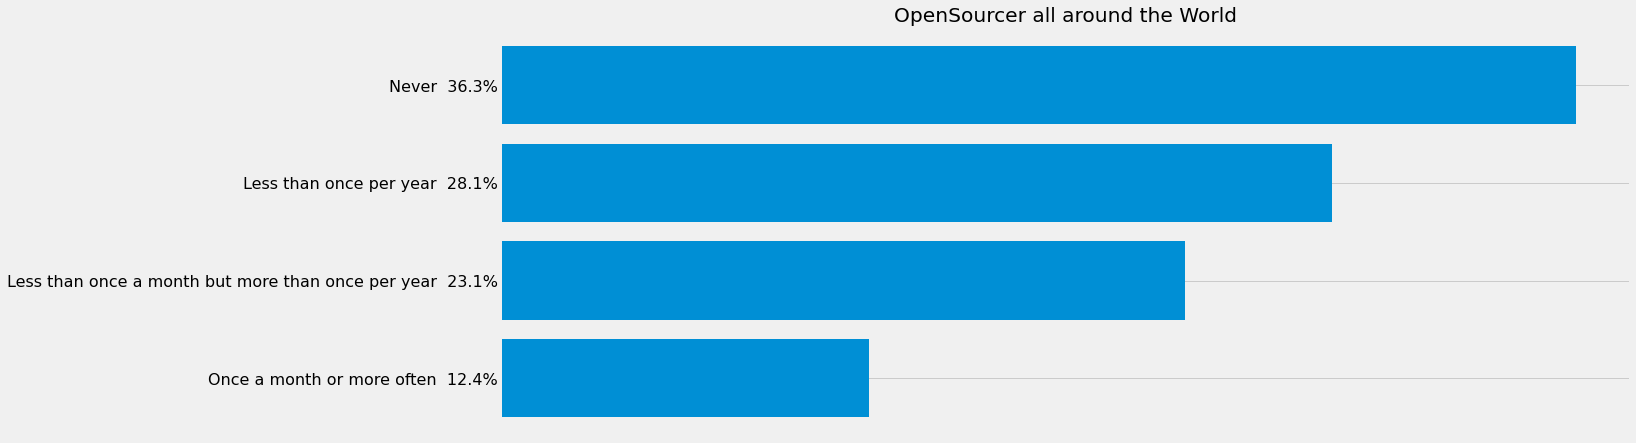

In [30]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

items = Counted_sorted.items()

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


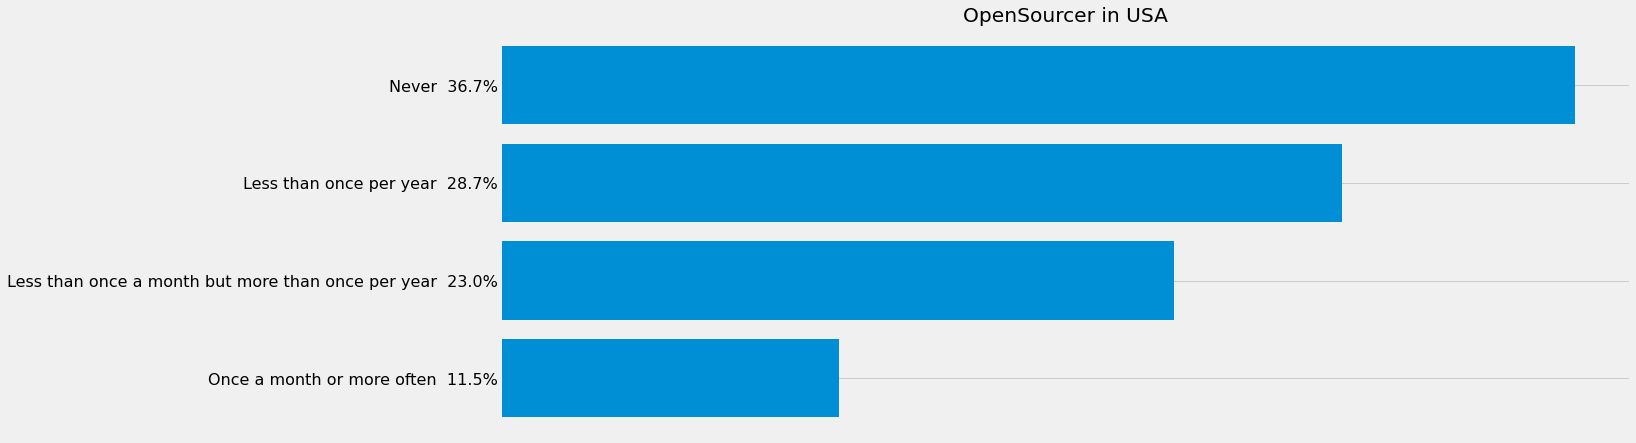

In [31]:
opensourcer =  data["OpenSourcer"]

opensourcer.dropna(inplace = True)

usa_opensourcer =  data[(opensourcer != "NaN") & (data["Country"] == "United States")]

Usa_opensourcer = usa_opensourcer["OpenSourcer"]

counted = Counter(Usa_opensourcer)  


Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

items = Counted_sorted.items()

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, Usa_opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer in USA")   # ვაგებთ გრაფიკს



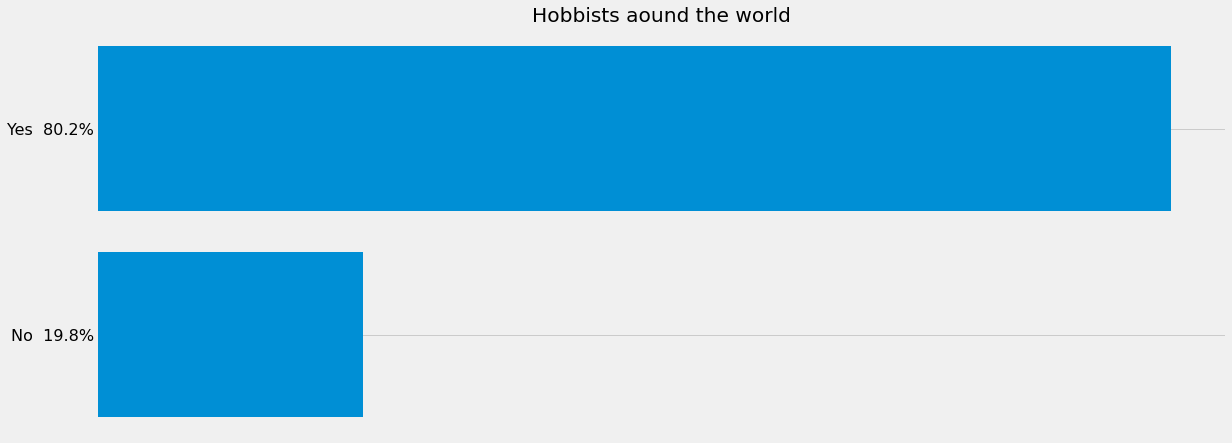

In [32]:
hobbists = data["Hobbyist"]
hobbists.dropna(inplace =  True)

counted =  Counter(hobbists)

counted = sort_dict_by_value(counted)

items = counted.items()

key_Phrases= []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, hobbists ,"fivethirtyeight", False , (18,7), "Hobbists aound the world")   # ვაგებთ გრაფიკს



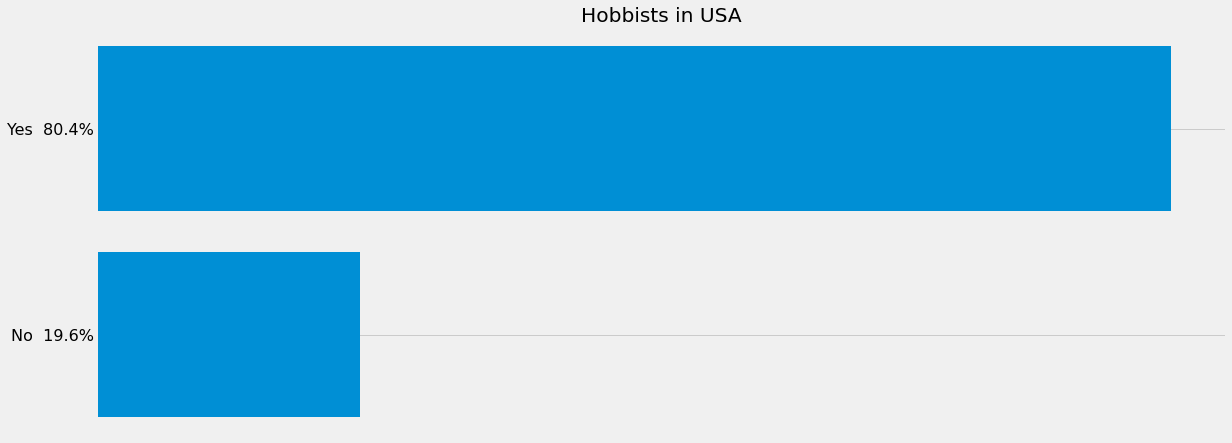

In [33]:
hobbists = data["Hobbyist"]
hobbists.dropna(inplace = True)

usa_hobbists =  data[(hobbists != "NaN") & (data["Country"] ==  "United States")]

Usa_hobbists = usa_hobbists["Hobbyist"]

counted = Counter(Usa_hobbists)

items =  counted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes(key_Phrases, Quantity, Usa_hobbists, "fivethirtyeight", False , (18,7), "Hobbists in USA")

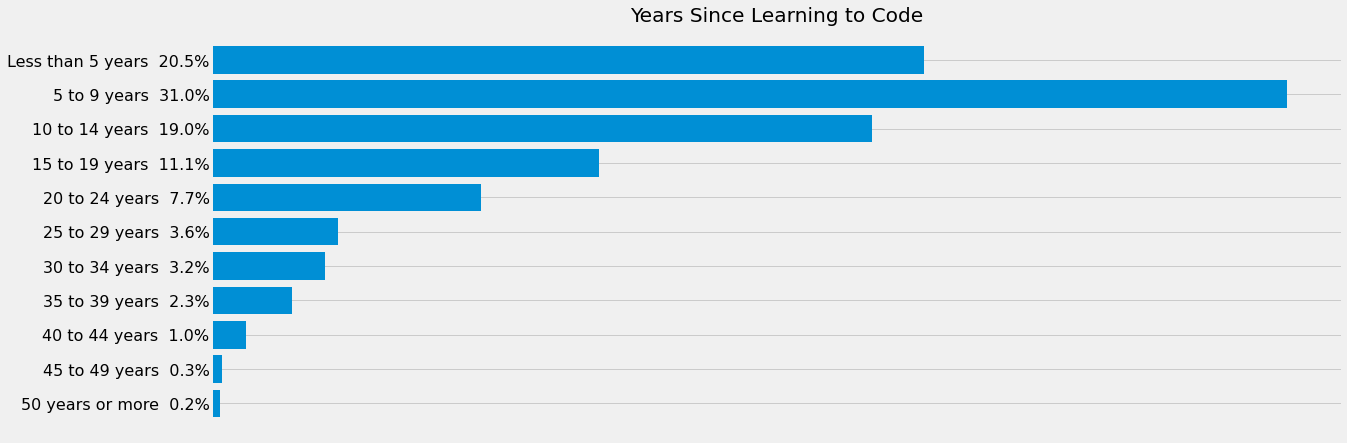

In [34]:
years_of_coding =  data["YearsCode"]
years_of_coding.dropna(inplace =  True)

#"more then 50 years" და "less than 1 year" ცვლადებს ვცვლი 50 და 1 წლად.
years_of_coding =  np.array(years_of_coding)
years_of_coding = np.where(years_of_coding == "Less than 1 year", "1", years_of_coding)
years_of_coding = np.where(years_of_coding == "More than 50 years", "50", years_of_coding)


def logics_for_years_of_coding(years_of_coding):
    #ვქმნი ცარიელ სიებს წლებით დაყოფის მიხედვით რომელსაც მერე ლოგიკით დავამატებ სხვადსხვა მონაცემებს 
    less_than_5 = []
    five_to_9 = []
    ten_to_14 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_or_more = []

    
    #თითოეულ სიას ვამატებ შესაბამის მონაცემს(იმედია სწორად)
    for i in years_of_coding:
        if int(i) in list(range(0,5)):
            less_than_5.append(i)
        elif int(i) in list(range(5,10)):
            five_to_9.append(i)
        elif int(i) in list(range(10,15)):
            ten_to_14.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        else:
            fifty_or_more.append(i)


    #ვიგებ ამ დამტებულიანების სიგრძეს რო გავიგო რამდენი მონაცემია თითოეულ სიაში 
    len_less_than_5 = len(less_than_5)
    len_five_to_9 = len(five_to_9)
    len_ten_to_14 = len(ten_to_14)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_or_more = len(fifty_or_more)
    
    global key_Phrases
    global Quantity

    key_Phrases = ["Less than 5 years", "5 to 9 years", "10 to 14 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", 
                 "30 to 34 years", "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 years or more"]
    Quantity = [len_less_than_5, len_five_to_9, len_ten_to_14, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29,
               len_thirty_to_34, len_thirtyfive_to_39, len_fourty_to_44, len_fourtyfive_to_49, len_fifty_or_more ]




logics_for_years_of_coding(years_of_coding)

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, years_of_coding, "fivethirtyeight", False , (18,7), "Years Since Learning to Code")







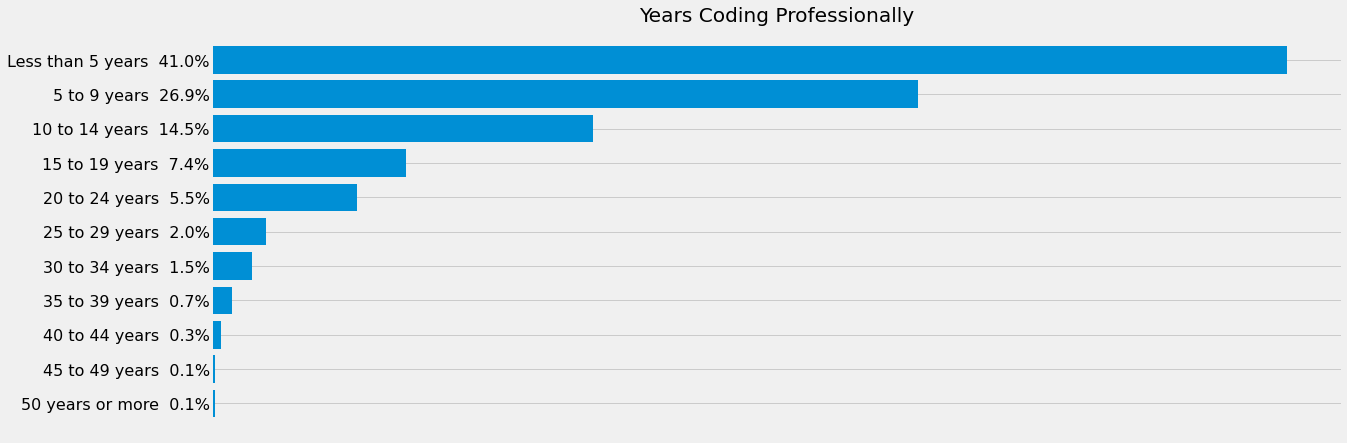

In [35]:
years_coding_as_pro =  data["YearsCodePro"]

years_coding_as_pro.dropna(inplace =  True)


#"more then 50 years" და "less than 1 year" ცვლადებს ვცვლი 50 და 1 წლად.
years_coding_as_pro =  np.array(years_coding_as_pro)
years_coding_as_pro = np.where(years_coding_as_pro == "Less than 1 year", "1", years_coding_as_pro)
years_coding_as_pro = np.where(years_coding_as_pro == "More than 50 years", "50", years_coding_as_pro)

logics_for_years_of_coding(years_coding_as_pro)

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, years_coding_as_pro, "fivethirtyeight", False , (18,7), "Years Coding Professionally")


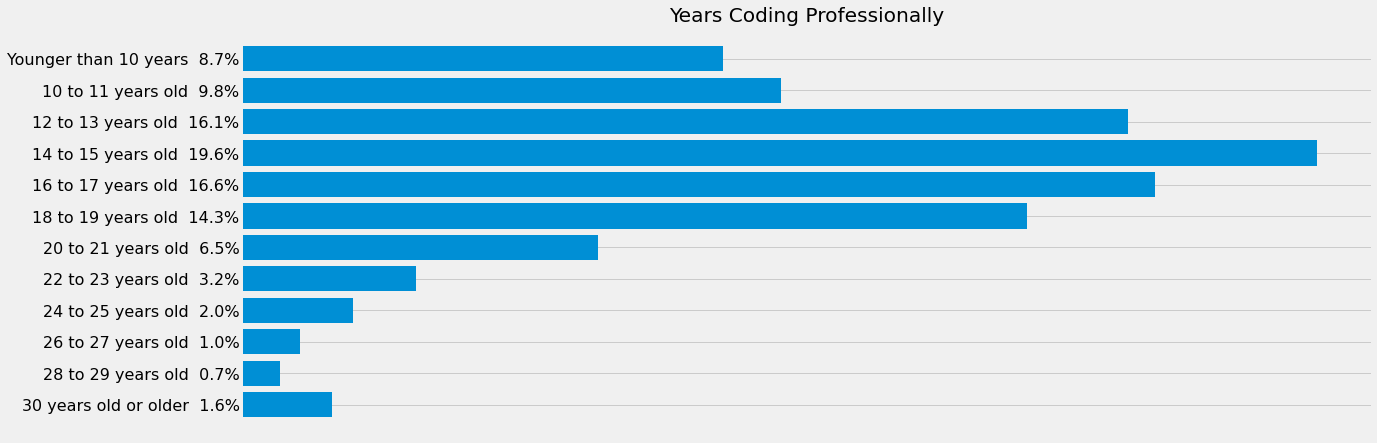

In [36]:
age_of_1st_code = data["Age1stCode"]
age_of_1st_code.dropna(inplace = True)

age_of_1st_code =  np.array(age_of_1st_code)
age_of_1st_code = np.where(age_of_1st_code == "Younger than 5 years", "1", age_of_1st_code)
age_of_1st_code = np.where(age_of_1st_code == "Older than 85", "30", age_of_1st_code)

def logics_for_age_of_1st_code(age_of_1st_code):
    #ცარიელი ლისტები მერე დასამატებლად
    younger_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = [] 
    from_28_to_29 = []
    thirty_or_older = []


    #თითოეულ სიას ვამატებ შესაბამის მონაცემს(იმედია სწორად)
    for i in age_of_1st_code:
        if int(i) in list(range(0,10)):
            younger_10.append(i)
        elif int(i) in list(range(10,12)):
            from_10_to_11.append(i)
        elif int(i) in list(range(12,14)):
            from_12_to_13.append(i)
        elif int(i) in list(range(14,16)):
            from_14_to_15.append(i)
        elif int(i) in list(range (16,18)):
            from_16_to_17.append(i)
        elif int(i) in list(range(18,20)):
            from_18_to_19.append(i)
        elif int(i) in list(range (20,22)):
            from_20_to_21.append(i)
        elif int(i) in list(range (22,24)):
            from_22_to_23.append(i)
        elif int(i) in list(range (24,26)):
            from_24_to_25.append(i)
        elif int(i) in list(range(26,28)):
            from_26_to_27.append(i)
        elif int(i) in list(range(28,30)):
            from_28_to_29.append(i)
        else:
            thirty_or_older.append(i)
    len_younger_10 = len(younger_10)
    len_from_10_to_11 = len(from_10_to_11)
    len_from_12_to_13 = len(from_12_to_13)
    len_from_14_to_15 = len(from_14_to_15)
    len_from_16_to_17 = len(from_16_to_17)
    len_from_18_to_19 = len(from_18_to_19)
    len_from_20_to_21 = len(from_20_to_21)
    len_from_22_to_23 = len(from_22_to_23)
    len_from_24_to_25 = len(from_24_to_25)
    len_from_26_to_27 = len(from_26_to_27) 
    len_from_28_to_29 = len(from_28_to_29)
    len_thirty_or_older = len(thirty_or_older)

            
    global key_Phrases 
    global Quantity

    key_Phrases = ["Younger than 10 years", "10 to 11 years old", "12 to 13 years old", "14 to 15 years old", "16 to 17 years old", 
                    "18 to 19 years old", "20 to 21 years old", "22 to 23 years old", "24 to 25 years old", "26 to 27 years old", 
                    "28 to 29 years old", "30 years old or older"]
    Quantity = [ len_younger_10, len_from_10_to_11 ,len_from_12_to_13, len_from_14_to_15, len_from_16_to_17, len_from_18_to_19,
                 len_from_20_to_21, len_from_22_to_23, len_from_24_to_25, len_from_26_to_27, len_from_28_to_29, len_thirty_or_older]

logics_for_age_of_1st_code(age_of_1st_code)

key_Phrases.reverse()
Quantity.reverse()
Build_Barh_sizes(key_Phrases, Quantity, age_of_1st_code, "fivethirtyeight", False , (18,7), "Years Coding Professionally")


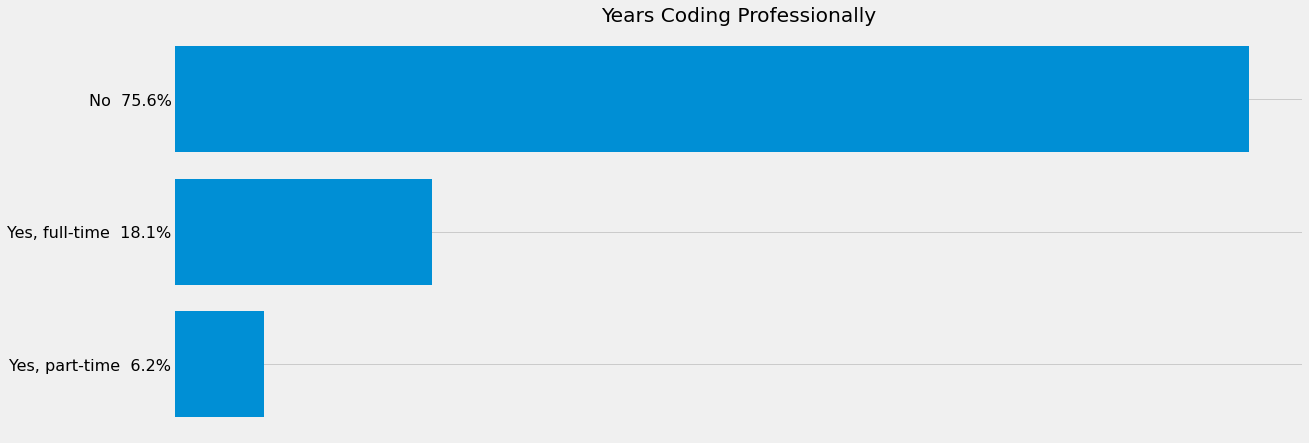

In [89]:
edu = data["Student"]
edu.dropna(inplace = True)

counted = Counter(edu)

items = counted.items()

key_Phrases= []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

key_Phrases.reverse()
Quantity.reverse()
Build_Barh_sizes(key_Phrases, Quantity, edu, "fivethirtyeight", False , (18,7), "")
